In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def preprocess(df):
    df['Stars'].replace('No rating', pd.NA, inplace=True)
    # Drop rows where 'Rating' is NaN
    df.dropna(subset=['Stars'], inplace=True)
    df['Stars'] = df['Stars'].astype(int)
    df.dropna(subset=['Review_Ukrainian'], inplace=True)
    
    df['sentiment'] = df['Stars'].apply(
        lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
    )
    df = df.rename(columns={'Review_Ukrainian': 'review'})
    return df

In [ ]:
df1 = preprocess(pd.read_csv('imdb_reviews_ukrainian_progress.csv'))
df2 = preprocess(pd.read_csv('imdb_reviews_ukrainian_progress_2.csv'))
df3 = preprocess(pd.read_csv('imdb_reviews_ukrainian_progress_3.csv'))
df4 = preprocess(pd.read_csv('imdb_reviews_ukrainian_progress_4.csv'))
df5 = preprocess(pd.read_csv('imdb_reviews_ukrainian_progress_5.csv'))
df6 = preprocess(pd.read_csv('imdb_reviews_ukrainian__negative_3.csv'))
df7 = preprocess(pd.read_csv('imdb_reviews_ukrainian__negative_2_4.csv'))

In [6]:
dfen = pd.concat([df1, df2, df3, df4, df5, df6, df7],  axis=0, ignore_index=True)
dfen.drop_duplicates(subset='Review', keep='first', inplace=True)
dfen

,Title,Review,Stars,review,sentiment
0,Reis (2017),A complete waste of time. Lower quality in eve...,1,"Повна трата часу.Нижча якість у всьому, що ми ...",0
1,Reis (2017),This movie was a complete waste of my time and...,1,Цей фільм був повною марною тратою мого часу т...,0
2,Reis (2017),This movie has been released right before the ...,1,"Цей фільм вийшов прямо перед референдумом, яки...",0
3,Reis (2017),Its very successful movie as a propaganda of a...,1,Його дуже успішний фільм як пропаганда політич...,0
4,Reis (2017),This is an awful film with a single message to...,1,Це жахливий фільм з одним повідомленням про пр...,0
...,...,...,...,...,...
23974,Death Race 2050 (Video 2017),It's a sequel/remake of Death Race 2000... and...,6,Це продовження/рімейк Seath Race 2000 ... і хо...,1
23975,Death Race 2050 (Video 2017),I know there is lots of great comments about t...,1,"Я знаю, що є багато чудових коментарів щодо фі...",0
23976,Death Race 2050 (Video 2017),OK. So it is cheap. The effects are terrible. ...,8,Добре.Тож це дешево.Ефекти жахливі.Акторська м...,2
23977,Death Race 2050 (Video 2017),"In true Deathrace style, Death Race 2050 is a ...",7,У справжньому стилі Deathrace смерть Race 2050...,1


In [7]:
dfu = pd.read_excel('UK_REVIEWS_END_1.xlsx')
dfu['Rating'] = dfu['Rating'].astype(int)
dfu['sentiment'] = dfu['Rating'].apply(
    lambda x: 0 if x <= 2 else (1 if x == 3 else 2)
)
# Select only the relevant columns from each DataFrame
dfu = dfu.rename(columns={'Review': 'review'})

In [8]:
dfen_selected = dfen[['review', 'sentiment']]
dfu_selected = dfu[['review', 'sentiment']]

# Concatenate both DataFrames vertically to merge reviews into a single column
df = pd.concat([dfen_selected, dfu_selected], axis=0, ignore_index=True)
df.drop_duplicates(subset='review', keep='first', inplace=True)
df

,review,sentiment
0,"Повна трата часу.Нижча якість у всьому, що ми ...",0
1,Цей фільм був повною марною тратою мого часу т...,0
2,"Цей фільм вийшов прямо перед референдумом, яки...",0
3,Його дуже успішний фільм як пропаганда політич...,0
4,Це жахливий фільм з одним повідомленням про пр...,0
...,...,...
22556,«Грають усі!» - заявляє на самому початку стрі...,0
22557,"Сучасного глядача не так легко здивувати, ніж ...",2
22558,Герої фільмів Франсуа Трюффо часто запитували:...,2
22559,"Гордон-Левітт, який зняв Гордона Левітта за сц...",1


In [9]:
# Clean up extra spaces and filter short reviews
df['review'] = df['review'].str.strip()  # Remove leading and trailing spaces
df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
filtered_df = df[df['review'].str.len() >= 500]  # Keep reviews with 100+ characters

# Reset index after filtering
filtered_df = filtered_df.reset_index(drop=True)


In [10]:
df

,review,sentiment
0,"Повна трата часу.Нижча якість у всьому, що ми ...",0
1,Цей фільм був повною марною тратою мого часу т...,0
2,"Цей фільм вийшов прямо перед референдумом, яки...",0
3,Його дуже успішний фільм як пропаганда політич...,0
4,Це жахливий фільм з одним повідомленням про пр...,0
...,...,...
22556,«Грають усі!» - заявляє на самому початку стрі...,0
22557,"Сучасного глядача не так легко здивувати, ніж ...",2
22558,Герої фільмів Франсуа Трюффо часто запитували:...,2
22559,"Гордон-Левітт, який зняв Гордона Левітта за сц...",1


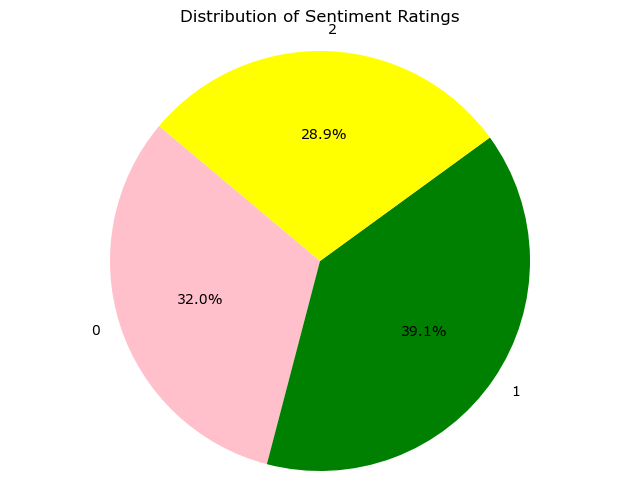

In [11]:
sentiment_counts = filtered_df['sentiment'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'green', 'yellow'])
plt.title('Distribution of Sentiment Ratings')
plt.axis('equal')
plt.show()

In [12]:
# Set target size for each class (minimum class size)
min_size = filtered_df['sentiment'].value_counts().min()

# Undersample each class to have 'min_size' samples
balanced_df = filtered_df.groupby('sentiment').apply(lambda x: x.sample(n=min_size, random_state=42)).reset_index(drop=True)

print("\nClass distribution after balancing:")
print(balanced_df['sentiment'].value_counts())


Class distribution after balancing:
sentiment
0    4950
1    4950
2    4950
Name: count, dtype: int64


C:\Users\BOSS\AppData\Local\Temp\ipykernel_20220\548002973.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = filtered_df.groupby('sentiment').apply(lambda x: x.sample(n=min_size, random_state=42)).reset_index(drop=True)


In [13]:
# balanced_df = pd.read_csv()

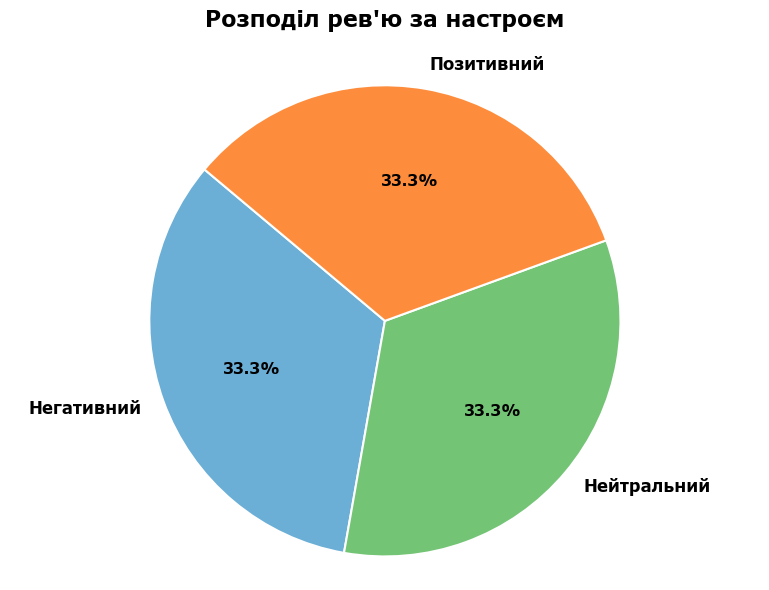

In [15]:
import matplotlib.pyplot as plt

# Define the sentiment categories and their colors
sentiment_counts = balanced_df['sentiment'].value_counts().sort_index()
categories = ['Негативний', 'Нейтральний', 'Позитивний']
colors = ['#6BAED6', '#74C476', '#FD8D3C']  # Blue, Green, Orange shades

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sentiment_counts, 
    labels=categories, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Style the text
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Add title and finalize
plt.title("Розподіл рев'ю за настроєм", fontsize=16, pad=25, fontweight='bold')
plt.axis('equal')  # Ensure the pie chart is a circle
plt.tight_layout()
plt.show()


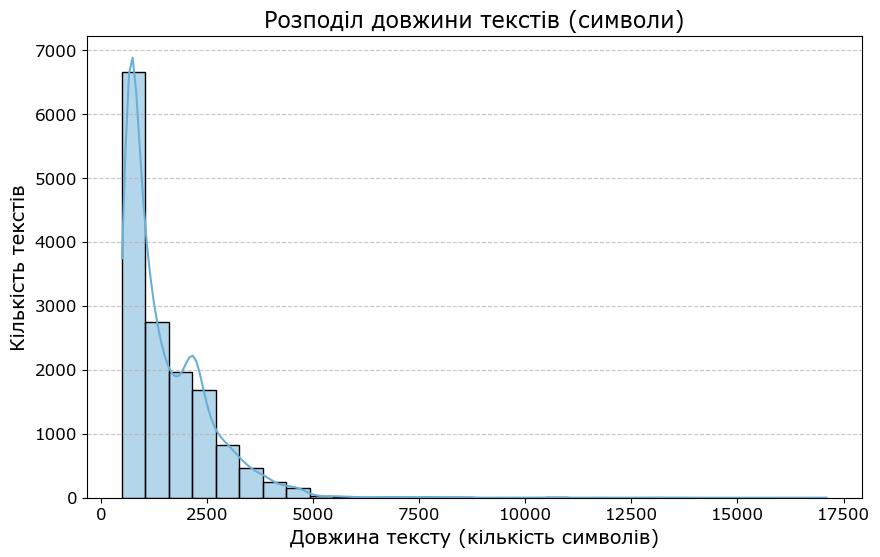

In [19]:
import seaborn as sns

balanced_df['text_length'] = balanced_df['review'].str.len()  # Calculate text lengths

plt.figure(figsize=(10, 6))
sns.histplot(
    balanced_df['text_length'], 
    bins=30, 
    kde=True, 
    color='#6BAED6'
)
plt.title('Розподіл довжини текстів (символи)', fontsize=16)
plt.xlabel('Довжина тексту (кількість символів)', fontsize=14)
plt.ylabel('Кількість текстів', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\BOSS\AppData\Local\Temp\ipykernel_18296\1093111168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


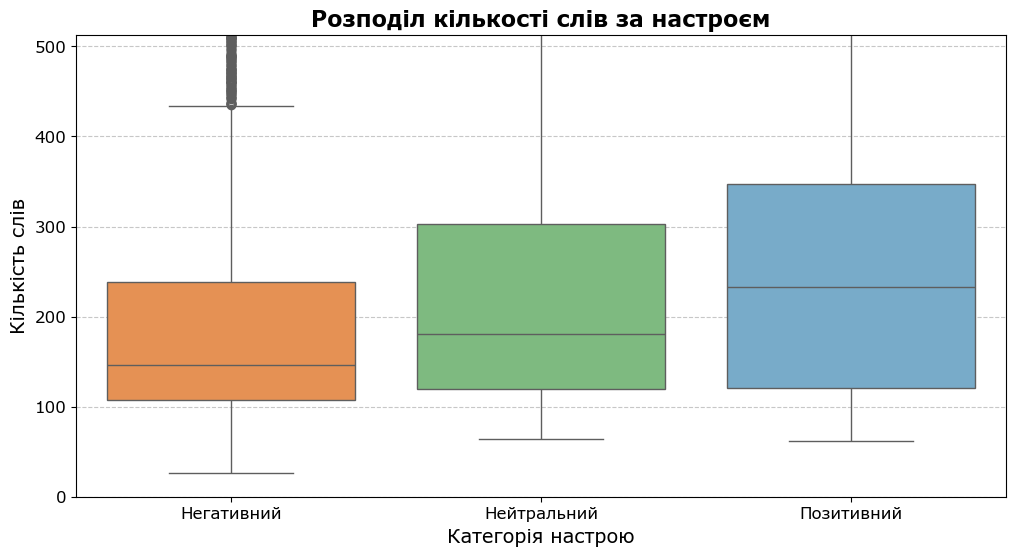

In [25]:
plt.figure(figsize=(12, 6))  # Wider aspect ratio for better visualization
sns.boxplot(
    x='sentiment', 
    y='word_count', 
    data=balanced_df, 
    palette=['#FD8D3C', '#74C476', '#6BAED6']
)

# Set Y-axis limits to focus on the main data range (adjust based on data distribution)
plt.ylim(0, balanced_df['word_count'].quantile(0.95))

# Add titles and labels
plt.title('Розподіл кількості слів за настроєм', fontsize=16, fontweight='bold')
plt.xlabel('Категорія настрою', fontsize=14)
plt.ylabel('Кількість слів', fontsize=14)
plt.xticks(
    ticks=[0, 1, 2], 
    labels=['Негативний', 'Нейтральний', 'Позитивний'], 
    fontsize=12
)
plt.yticks(fontsize=12)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\BOSS\AppData\Local\Temp\ipykernel_18296\2476897297.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(words), x=list(counts), palette='viridis')


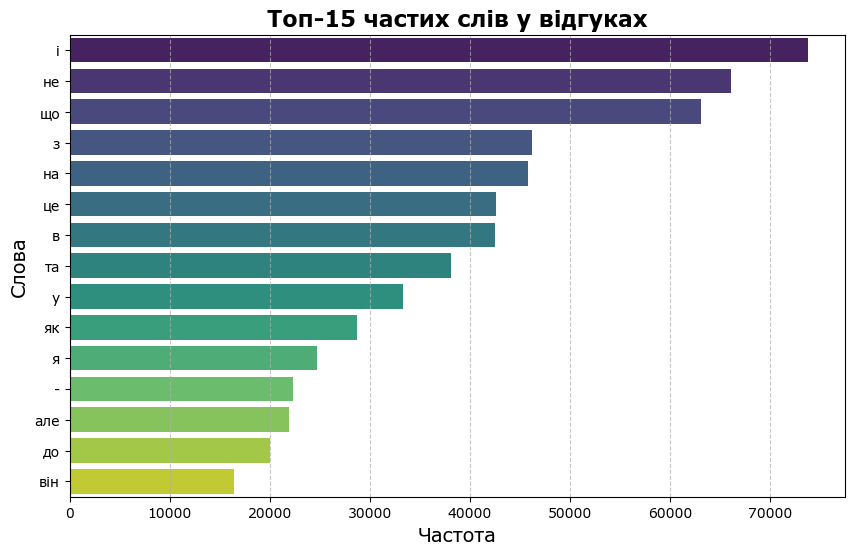

In [28]:
from collections import Counter

# Tokenize and count word frequencies
word_counts = Counter(' '.join(balanced_df['review']).split())
common_words = word_counts.most_common(15)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(y=list(words), x=list(counts), palette='viridis')
plt.title('Топ-15 частих слів у відгуках', fontsize=16, fontweight='bold')
plt.xlabel('Частота', fontsize=14)
plt.ylabel('Слова', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\BOSS\AppData\Local\Temp\ipykernel_18296\1221507571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


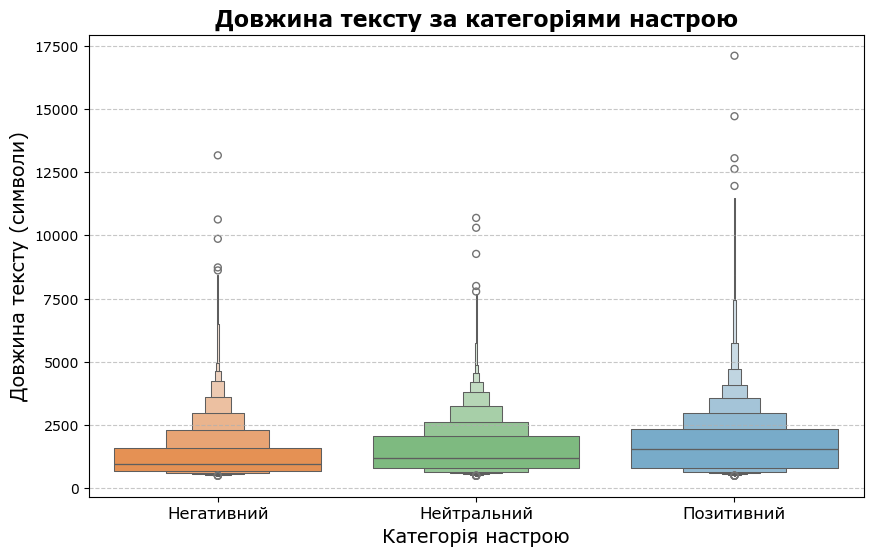

In [32]:
plt.figure(figsize=(10, 6))
sns.boxenplot(
    x='sentiment', 
    y='text_length', 
    data=balanced_df, 
    palette=['#FD8D3C', '#74C476', '#6BAED6']
)
plt.title('Довжина тексту за категоріями настрою', fontsize=16, fontweight='bold')
plt.xlabel('Категорія настрою', fontsize=14)
plt.ylabel('Довжина тексту (символи)', fontsize=14)
plt.xticks(
    ticks=[0, 1, 2], 
    labels=['Негативний', 'Нейтральний', 'Позитивний'], 
    fontsize=12
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
balanced_df.to_csv('balanced_19k.csv')

In [ ]:
balanced_df.to_excel('balanced_19k.xlsx')

In [2]:
import random as r
import pandas as pd

In [3]:
balanced_df = pd.read_csv('balanced_15k.csv')

In [4]:
list(balanced_df[balanced_df['sentiment']==2]['review'].values)

['Вітальне повернення (свого роду) від господаря жаху Даріо Аргенто та «Мати сліз», хоча і не його найкраща робота, безумовно, є найбільш явною картиною (на сьогоднішній день).Історія вільно заснована на його попередніх двох фільмах відьом ("Сусперія" та "Інферно"), але вам не потрібно їх бачити спочатку, щоб насолодитися останньою в цій досить спеціальній трилогії.Містить графіку, секс та насильство, з цілою великою кількістю чортового поклоніння, кинутих у суміш.Це дійсно може отримати багато палиць від аргенто -пуристів, але я дійсно взявся до персонажів і кричущих, диявольських заходів.Зрештою, і найголовніше (для мене) він дійсно доставляє, а його дочка Азія - це завжди чудовий годинник.',
 "На вітчизняні екрани виходить один із фаворитів кінематографічної фортуни цього року – «Даласький клуб покупців» канадця Жана-Марка Валле: стрічка отримала 2 «Золоті глобуси» та 3 «Оскари». Напевно, режисер із продюсерами заздалегідь на це і розраховували. Типовий представник техаського «білог

In [5]:
r.sample(list(balanced_df[balanced_df['sentiment']==0]['review'].values), 5)

['Якщо ви бачили цей фільм, то ви дізнаєтесь, що це один з найгірших фільмів про Боллівуд.Відомо, що Боллівуд копіює голлівудські фільми.Хто б знав, що вони скопіюють Термінатор 2. Різниця між обома кіноіндустріями - Голлівуд витрачає мільйони, а Боллівуд витрачає 100 тисяч (в середньому).Це проблема з цим фільмом, якщо ви хочете зробити фільм стилю T2, то зробіть це належним чином.Режисер додав фальшиву фантастичну сюжетну лінію про перевтілену змію, яка знаходить свою давно загублену дівчину (за попереднє народження) мертвою двома хлопцями, але провина йде на 10 людей.Вона раптом перевтілюється в привид і разом хоче вбити 10 людей, яких вони звинувачують у її смерті.Не кажучи вже про перевтілену зміїну хлопця чи лиходія, має якісь суперсили.Він може перетворитися на все, що може літати, зникати, пожежну силу, потужність вітру, ти називаєш це, у нього є.Він навіть опускається і переживає стиль T1000.Вам, мабуть, цікаво, як він виживає.Найкраще не просити, і найкраще не витрачати час і

In [6]:
r.sample(list(balanced_df[balanced_df['sentiment']==1]['review'].values), 5)

['Це багато що говорить, як перший будинок мертвих був абсолютно безглуздим.Я очікував, що продовження стане ще гіршим, але насправді, хоча це не велике, це набагато краще.Правда, це не ідеально, липкий Фінгаз ніколи насправді не переконував мене часто переоцінює свою частину (хоча його сцена смерті весела), історія не має величезних сюрпризСценарій, маючи дивне дотепне місце, є банальним, персонажі є стереотипними, і, поки ніде не настільки дратівливі, як у першого, все ще не дуже легко грітися, а напрямок Майкла Херста, нескінченно кращий за Уве Болл (тоді знову будь -який режисерКраще, ніж Болл) має занадто багато моментів, коли він є пішохідним.З іншого боку, декорації та освітлення набагато більш атмосферні, і цей фільм набагато краще відредагований.Музика не дуже виділяється, але не така переносна і не відчуває себе приводом, щоб включити деякі відлякування в те, що відчуває себе одним бурхливим, довгим музичним відео (перший фільм відчував себе так).Закінчення Downbeat - це віта

In [7]:
r.sample(list(balanced_df[balanced_df['sentiment']==2]['review'].values), 5)

["Це шоу чесно чудове.Це легко найкраще анімаційне шоу, яке я бачив за деякий час у будь -якій мережі.Друге, що починається шоу, ви можете сказати, що персонажі ідеально вписуються один до одного, і пов'язані з божевіллям, що трапляється у Всесвіті з Ріком та Морті, вони одразу веселі та надзвичайно креативні.Кілька епізодів, і я міг сказати, що це унікальне шоу, і що людям потрібно дивитися його, оскільки він має величезний потенціал.І з Деном Хармоном пише і режисуру на кермі всього цього, магія, яку приносить це шоу, є рідкісним дорогоцінним каменем на телебаченні, яке людям потрібно дивитись .. так що так, я дуже пропоную це шоу кожному, хто хоче справжнього справжнього сміху, принаймніраз на тиждень.",
 "Навіть цікаво, скільки на українських глядачів чекали вихід на екрани 4-ї частини франшизи «Нестримні». Оскільки насправді неабияку їх частину, мабуть, чекає певне розчарування. Чому? Про це трохи нижче. Десь у Лівії, на старому хімічному заводі, має місце якась заварушка за участ

(array([5.924e+03, 1.285e+03, 3.730e+02, 1.020e+02, 6.000e+00, 3.000e+00,
        5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([3.00000e+00, 1.31910e+03, 2.63520e+03, 3.95130e+03, 5.26740e+03,
        6.58350e+03, 7.89960e+03, 9.21570e+03, 1.05318e+04, 1.18479e+04,
        1.31640e+04]),
 <BarContainer object of 10 artists>)

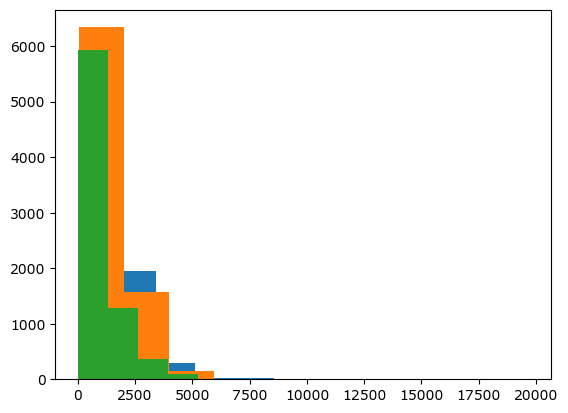

In [ ]:
plt.hist(df[df['sentiment']==2]['review'].str.len())
# ax1.set_title( 'Positive Reviews')
# ax2.set_title( 'Negative Reviews')

(array([5.924e+03, 1.285e+03, 3.730e+02, 1.020e+02, 6.000e+00, 3.000e+00,
        5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([3.00000e+00, 1.31910e+03, 2.63520e+03, 3.95130e+03, 5.26740e+03,
        6.58350e+03, 7.89960e+03, 9.21570e+03, 1.05318e+04, 1.18479e+04,
        1.31640e+04]),
 <BarContainer object of 10 artists>)

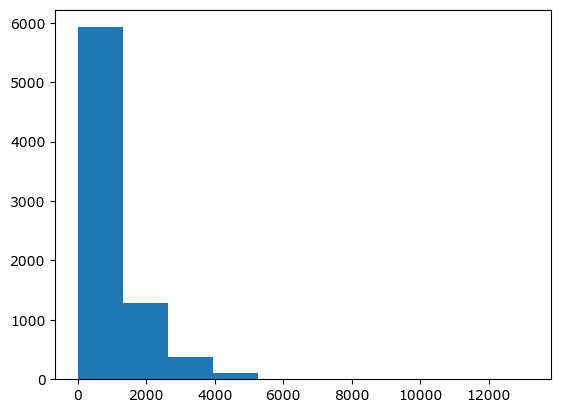

In [48]:

plt.hist(df[df['sentiment']==0]['review'].str.len())
# ax2.set_title( 'Negative Reviews')

(array([6.340e+03, 1.575e+03, 1.460e+02, 6.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   36. ,  2000.3,  3964.6,  5928.9,  7893.2,  9857.5, 11821.8,
        13786.1, 15750.4, 17714.7, 19679. ]),
 <BarContainer object of 10 artists>)

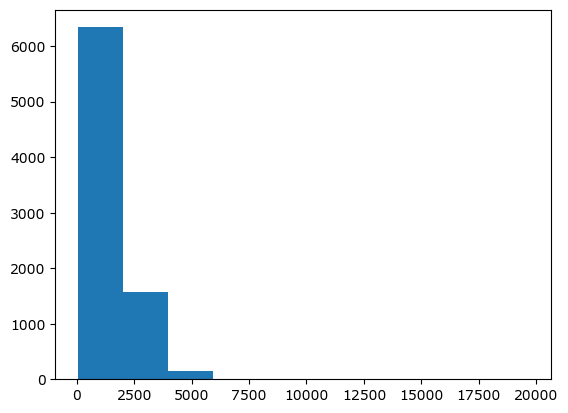

In [47]:
plt.hist(df[df['sentiment']==1]['review'].str.len())


In [35]:
df7

,Title,Review,Stars,review,sentiment
0,Enes Batur: Hayal Mi Gerçek Mi? (2018),This movie is a tool to convert Youtube Fans i...,1,Цей фільм - це інструмент для перетворення шан...,0
1,Enes Batur: Hayal Mi Gerçek Mi? (2018),While reviewing this movie the first thing to ...,1,"Під час перегляду цього фільму перше, що слід ...",0
2,Enes Batur: Hayal Mi Gerçek Mi? (2018),Second-hand embarrassment at its finest. Even ...,1,Збентеження секонд-хенду в найкращій.Навіть лю...,0
3,Enes Batur: Hayal Mi Gerçek Mi? (2018),"To be honest, it doesn't deserve either 1 or 1...",1,"Якщо чесно, це не заслуговує ні 1, ні 10. Він ...",0
4,Enes Batur: Hayal Mi Gerçek Mi? (2018),-waste of time -loss of money\ndisgusting scri...,1,-вастям часу -Висота грошей\nогидний сценарій\...,0
...,...,...,...,...,...
8062,Death Race 2050 (Video 2017),It's a sequel/remake of Death Race 2000... and...,6,Це продовження/рімейк Seath Race 2000 ... і хо...,1
8063,Death Race 2050 (Video 2017),I know there is lots of great comments about t...,1,"Я знаю, що є багато чудових коментарів щодо фі...",0
8064,Death Race 2050 (Video 2017),OK. So it is cheap. The effects are terrible. ...,8,Добре.Тож це дешево.Ефекти жахливі.Акторська м...,2
8065,Death Race 2050 (Video 2017),"In true Deathrace style, Death Race 2050 is a ...",7,У справжньому стилі Deathrace смерть Race 2050...,1


In [22]:
dfe = pd.read_csv('imdb_reviews_ukrainian_progress.csv')
dfe['Stars'].replace('No rating', pd.NA, inplace=True)

# Drop rows where 'Rating' is NaN
dfe.dropna(subset=['Stars'], inplace=True)
dfe['Stars'] = dfe['Stars'].astype(int)
dfe['sentiment'] = dfe['Stars'].apply(
    lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
)
dfe

C:\Users\BOSS\AppData\Local\Temp\ipykernel_16156\1826663344.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfe['Stars'].replace('No rating', pd.NA, inplace=True)


,Title,Review,Stars,Review_Ukrainian,sentiment
0,Reis (2017),A complete waste of time. Lower quality in eve...,1,"Повна трата часу.Нижча якість у всьому, що ми ...",0
1,Reis (2017),This movie was a complete waste of my time and...,1,Цей фільм був повною марною тратою мого часу т...,0
2,Reis (2017),This movie has been released right before the ...,1,"Цей фільм вийшов прямо перед референдумом, яки...",0
3,Reis (2017),Its very successful movie as a propaganda of a...,1,Його дуже успішний фільм як пропаганда політич...,0
4,Reis (2017),This is an awful film with a single message to...,1,Це жахливий фільм з одним повідомленням про пр...,0
...,...,...,...,...,...
601,Justin Bieber: Never Say Never (2011),"Idk y all the low ratings , honestly it's a go...",7,"IDK y всі низькі рейтинги, чесно кажучи, це хо...",1
602,Justin Bieber: Never Say Never (2011),I feel bad for Ludicrous and Usher for being s...,1,Я почуваюся погано за смішним і присутнім за т...,0
603,Justin Bieber: Never Say Never (2011),'This movie contains no material likely to off...,1,"""Цей фільм не містить матеріалу, який може обр...",0
604,Justin Bieber: Never Say Never (2011),If I had even one tread of respect for Justin ...,1,Якби я мав навіть один протектор поваги до Джа...,0


In [ ]:
dfu = pd.read_excel('UK_REVIEWS_END_1.xlsx')
dfu['Rating'] = dfu['Rating'].astype(int)
dfu['sentiment'] = dfu['Rating'].apply(
    lambda x: 0 if x <= 2 else (1 if x == 3 else 2)
)

dfu

,Author,Rating,Film,Review
0,JSilver,3,Самотні вовки,Клуні та Пітт зустрічаються в одному фільму вп...
1,Алексей Першко,5,Джокер: Божевілля на двох,«Джокер: Божевілля на двох» — зовсім не те про...
2,JSilver,4,Моя стара дупа,"Останнім часом ловлю себе на думці, що чимало ..."
3,NedzelnitkskyAnd,4,Караоке,"Кіно, як і життя, - це не тільки гучні прем’єр..."
4,NedzelnitkskyAnd,4,Шанталь у Магічному Королівстві,Жити без посмішки – неможливо – інакше це прос...
...,...,...,...,...
3572,Алексей Першко,2,Сліпа удача,«Грають усі!» - заявляє на самому початку стрі...
3573,Elen Voynova,4,Навколо футболу,"Сучасного глядача не так легко здивувати, ніж ..."
3574,Алексей Першко,4,Пристрасті Дон Жуана,Герої фільмів Франсуа Трюффо часто запитували:...
3575,Anna_Bel,3,Пристрасті Дон Жуана,"Гордон-Левітт, який зняв Гордона Левітта за сц..."


In [ ]:
# Select only the relevant columns from each DataFrame
dfe = dfe.rename(columns={'Review_Ukrainian': 'review'})
dfu = dfu.rename(columns={'Review': 'review'})

dfe_selected = dfe[['review', 'sentiment']]
dfu_selected = dfu[['review', 'sentiment']]

# Concatenate both DataFrames vertically to merge reviews into a single column
combined_df = pd.concat([dfe_selected, dfu_selected], axis=0, ignore_index=True)

combined_df

In [16]:
dfe2 = preprocess(pd.read_csv('imdb_reviews_ukrainian_progress_2.csv'))
dfe2

C:\Users\BOSS\AppData\Local\Temp\ipykernel_16156\1613264668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stars'].replace('No rating', pd.NA, inplace=True)


,Title,Review,Stars,Review_Ukrainian,sentiment
0,Красуня та страховисько або не народись вродли...,Surveillance Vido of an Empty Parking Lot Is A...,1,Спостереження Відо з порожньої стоянки - це бі...,0
1,Красуня та страховисько або не народись вродли...,"OK, I'm not going to bash this film based on P...",1,"Гаразд, я не збираюся бити цей фільм на основі...",0
2,Красуня та страховисько або не народись вродли...,"this movie is to say the least, one of the wor...",1,"Цей фільм, як мінімум, одна з найгірших речей,...",0
3,Красуня та страховисько або не народись вродли...,AWFUL!!!\n\nIf ever there was a case for barri...,1,Жахливо !!!\n\nЯкщо коли -небудь був випадок з...,0
4,Красуня та страховисько або не народись вродли...,I am just amazed that (as of this moment) ther...,1,"Я просто вражений, що (з цього моменту) є 554 ...",0
...,...,...,...,...,...
2389,Hungama 2 (2021),Too much fuss out of nothing This goes well wi...,1,"Занадто багато суєти з нічого, це добре поєдну...",0
2390,Hungama 2 (2021),"I am great fan of Paresh Rawal, but this again...",1,"Я великий фанат Пареш Равал, але це знову було...",0
2391,Hungama 2 (2021),Another perfection in ruining hit movie and a ...,1,Ще одна досконалість у руйнуванні хіт-фільму т...,0
2392,Hungama 2 (2021),Movie looks so outdated. Who gives love letter...,1,Фільм виглядає настільки застарілим.Хто дає лю...,0


In [4]:
dfe2['Stars'].replace('No rating', pd.NA, inplace=True)
dfe2.dropna(subset=['Stars'], inplace=True)
dfe2

C:\Users\BOSS\AppData\Local\Temp\ipykernel_2128\329525524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfe2['Stars'].replace('No rating', pd.NA, inplace=True)


,Title,Review,Stars,Review_Ukrainian
0,Красуня та страховисько або не народись вродли...,Surveillance Vido of an Empty Parking Lot Is A...,1,Спостереження Відо з порожньої стоянки - це бі...
1,Красуня та страховисько або не народись вродли...,"OK, I'm not going to bash this film based on P...",1,"Гаразд, я не збираюся бити цей фільм на основі..."
2,Красуня та страховисько або не народись вродли...,"this movie is to say the least, one of the wor...",1,"Цей фільм, як мінімум, одна з найгірших речей,..."
3,Красуня та страховисько або не народись вродли...,AWFUL!!!\n\nIf ever there was a case for barri...,1,Жахливо !!!\n\nЯкщо коли -небудь був випадок з...
4,Красуня та страховисько або не народись вродли...,I am just amazed that (as of this moment) ther...,1,"Я просто вражений, що (з цього моменту) є 554 ..."
...,...,...,...,...
2389,Hungama 2 (2021),Too much fuss out of nothing This goes well wi...,1,"Занадто багато суєти з нічого, це добре поєдну..."
2390,Hungama 2 (2021),"I am great fan of Paresh Rawal, but this again...",1,"Я великий фанат Пареш Равал, але це знову було..."
2391,Hungama 2 (2021),Another perfection in ruining hit movie and a ...,1,Ще одна досконалість у руйнуванні хіт-фільму т...
2392,Hungama 2 (2021),Movie looks so outdated. Who gives love letter...,1,Фільм виглядає настільки застарілим.Хто дає лю...


In [5]:
dfe2['Stars'] = dfe2['Stars'].astype(int)
dfe2['sentiment'] = dfe2['Stars'].apply(
    lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
)
dfe2.dropna(subset=['Review_Ukrainian'], inplace=True)

In [6]:
dfe2

,Title,Review,Stars,Review_Ukrainian,sentiment
0,Красуня та страховисько або не народись вродли...,Surveillance Vido of an Empty Parking Lot Is A...,1,Спостереження Відо з порожньої стоянки - це бі...,0
1,Красуня та страховисько або не народись вродли...,"OK, I'm not going to bash this film based on P...",1,"Гаразд, я не збираюся бити цей фільм на основі...",0
2,Красуня та страховисько або не народись вродли...,"this movie is to say the least, one of the wor...",1,"Цей фільм, як мінімум, одна з найгірших речей,...",0
3,Красуня та страховисько або не народись вродли...,AWFUL!!!\n\nIf ever there was a case for barri...,1,Жахливо !!!\n\nЯкщо коли -небудь був випадок з...,0
4,Красуня та страховисько або не народись вродли...,I am just amazed that (as of this moment) ther...,1,"Я просто вражений, що (з цього моменту) є 554 ...",0
...,...,...,...,...,...
2389,Hungama 2 (2021),Too much fuss out of nothing This goes well wi...,1,"Занадто багато суєти з нічого, це добре поєдну...",0
2390,Hungama 2 (2021),"I am great fan of Paresh Rawal, but this again...",1,"Я великий фанат Пареш Равал, але це знову було...",0
2391,Hungama 2 (2021),Another perfection in ruining hit movie and a ...,1,Ще одна досконалість у руйнуванні хіт-фільму т...,0
2392,Hungama 2 (2021),Movie looks so outdated. Who gives love letter...,1,Фільм виглядає настільки застарілим.Хто дає лю...,0


In [7]:
dfe = pd.concat([dfe, dfe2],  axis=0, ignore_index=True)


In [8]:
dfe.dropna(subset=['Stars'], inplace=True)
dfe

,Title,Review,Stars,Review_Ukrainian,sentiment
0,Reis (2017),A complete waste of time. Lower quality in eve...,1,"Повна трата часу.Нижча якість у всьому, що ми ...",0
1,Reis (2017),This movie was a complete waste of my time and...,1,Цей фільм був повною марною тратою мого часу т...,0
2,Reis (2017),This movie has been released right before the ...,1,"Цей фільм вийшов прямо перед референдумом, яки...",0
3,Reis (2017),Its very successful movie as a propaganda of a...,1,Його дуже успішний фільм як пропаганда політич...,0
4,Reis (2017),This is an awful film with a single message to...,1,Це жахливий фільм з одним повідомленням про пр...,0
...,...,...,...,...,...
2783,Hungama 2 (2021),Too much fuss out of nothing This goes well wi...,1,"Занадто багато суєти з нічого, це добре поєдну...",0
2784,Hungama 2 (2021),"I am great fan of Paresh Rawal, but this again...",1,"Я великий фанат Пареш Равал, але це знову було...",0
2785,Hungama 2 (2021),Another perfection in ruining hit movie and a ...,1,Ще одна досконалість у руйнуванні хіт-фільму т...,0
2786,Hungama 2 (2021),Movie looks so outdated. Who gives love letter...,1,Фільм виглядає настільки застарілим.Хто дає лю...,0


In [ ]:
dfu['Rating'] = dfu['Rating'].astype(int)
dfu['sentiment'] = dfu['Rating'].apply(
    lambda x: 0 if x <= 2 else (1 if x == 3 else 2)
)


In [12]:
dfu

,Author,Rating,Film,Review,sentiment
0,JSilver,3,Самотні вовки,Клуні та Пітт зустрічаються в одному фільму вп...,1
1,Алексей Першко,5,Джокер: Божевілля на двох,«Джокер: Божевілля на двох» — зовсім не те про...,2
2,JSilver,4,Моя стара дупа,"Останнім часом ловлю себе на думці, що чимало ...",2
3,NedzelnitkskyAnd,4,Караоке,"Кіно, як і життя, - це не тільки гучні прем’єр...",2
4,NedzelnitkskyAnd,4,Шанталь у Магічному Королівстві,Жити без посмішки – неможливо – інакше це прос...,2
...,...,...,...,...,...
3572,Алексей Першко,2,Сліпа удача,«Грають усі!» - заявляє на самому початку стрі...,0
3573,Elen Voynova,4,Навколо футболу,"Сучасного глядача не так легко здивувати, ніж ...",2
3574,Алексей Першко,4,Пристрасті Дон Жуана,Герої фільмів Франсуа Трюффо часто запитували:...,2
3575,Anna_Bel,3,Пристрасті Дон Жуана,"Гордон-Левітт, який зняв Гордона Левітта за сц...",1


In [13]:
# Select only the relevant columns from each DataFrame
dfe = dfe.rename(columns={'Review_Ukrainian': 'review'})
dfu = dfu.rename(columns={'Review': 'review'})

dfe_selected = dfe[['review', 'sentiment']]
dfu_selected = dfu[['review', 'sentiment']]

# Concatenate both DataFrames vertically to merge reviews into a single column
combined_df = pd.concat([dfe_selected, dfu_selected], axis=0, ignore_index=True)

combined_df

,review,sentiment
0,"Повна трата часу.Нижча якість у всьому, що ми ...",0
1,Цей фільм був повною марною тратою мого часу т...,0
2,"Цей фільм вийшов прямо перед референдумом, яки...",0
3,Його дуже успішний фільм як пропаганда політич...,0
4,Це жахливий фільм з одним повідомленням про пр...,0
...,...,...
6360,«Грають усі!» - заявляє на самому початку стрі...,0
6361,"Сучасного глядача не так легко здивувати, ніж ...",2
6362,Герої фільмів Франсуа Трюффо часто запитували:...,2
6363,"Гордон-Левітт, який зняв Гордона Левітта за сц...",1


In [ ]:
df4 = pd.read_csv('imdb_reviews_ukrainian_progress_4.csv')
df4['Stars'].replace('No rating', pd.NA, inplace=True)

# Drop rows where 'Rating' is NaN
df4.dropna(subset=['Stars'], inplace=True)
df4['Stars'] = df4['Stars'].astype(int)
df4['sentiment'] = df4['Stars'].apply(
    lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
)
df4

In [27]:
df3 = pd.read_csv('imdb_reviews_ukrainian_progress_3.csv')
df3['Stars'].replace('No rating', pd.NA, inplace=True)

# Drop rows where 'Rating' is NaN
df3.dropna(subset=['Stars'], inplace=True)
df3['Stars'] = df3['Stars'].astype(int)
df3['sentiment'] = df3['Stars'].apply(
    lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
)
df3.dropna(subset=['Review_Ukrainian'], inplace=True)
df3

C:\Users\BOSS\AppData\Local\Temp\ipykernel_2128\476923190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Stars'].replace('No rating', pd.NA, inplace=True)


,Title,Review,Stars,Review_Ukrainian,sentiment
0,Часовий зріз (2024),I didn't have high expectations for this film ...,4,"Я не мав великих очікувань щодо цього фільму, ...",1
1,Часовий зріз (2024),Sometimes when they make slasher movies that a...,5,"Іноді, коли вони знімають фільми про косої час...",1
2,Часовий зріз (2024),I've been waiting for this film for three year...,4,"Я чекав цього фільму три роки.На жаль, це дуже...",1
3,Часовий зріз (2024),I wanted to like this one. I love time travel ...,3,Мені хотілося сподобатися цьому.Я люблю фільми...,0
4,Часовий зріз (2024),Hmm.. I loved totally killer and when I saw tr...,1,"Хм .. я любив абсолютно вбивцю, і коли я побач...",0
...,...,...,...,...,...
2843,"Slap Her, She's French! (2002)","She Gets What She Wants, also known as ""Slap H...",7,"Вона отримує те, що хоче, також відома як ""ляп...",1
2844,"Slap Her, She's French! (2002)",Even I think this movie is okay. This movie sh...,6,"Навіть я думаю, що цей фільм гаразд.Цей фільм ...",1
2845,"Slap Her, She's French! (2002)","When I started watching this movie, I was conf...",1,"Коли я почав дивитися цей фільм, я розгублений...",0
2846,"Slap Her, She's French! (2002)",Many of the negative reviews of this film are ...,9,"Багато негативних відгуків цього фільму, очеви...",2


In [ ]:
dfe_2 = pd.concat([df3, df4],  axis=0, ignore_index=True)
dfe_2.dropna(subset=['Review_Ukrainian'], inplace=True)


In [21]:
df5 = pd.read_csv('imdb_reviews_ukrainian_progress_5.csv')
df5['Stars'].replace('No rating', pd.NA, inplace=True)

# Drop rows where 'Rating' is NaN
df5.dropna(subset=['Stars'], inplace=True)
df5['Stars'] = df5['Stars'].astype(int)
df5['sentiment'] = df5['Stars'].apply(
    lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
)
df5

C:\Users\BOSS\AppData\Local\Temp\ipykernel_2128\1971896585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df5['Stars'].replace('No rating', pd.NA, inplace=True)


,Title,Review,Stars,Review_Ukrainian,sentiment
0,Офіс (TV Series 2005–2013),"I'm going to go straight to the point, and say...",10,"Я збираюся йти прямо до суті, і скажу, що це н...",2
1,Офіс (TV Series 2005–2013),The Office is one of the best sitcoms ever mad...,10,"Офіс - один з найкращих ситкомів, що коли -неб...",2
2,Офіс (TV Series 2005–2013),For the past several months since I dropped my...,10,"Останні кілька місяців, як я кинув кабельну ко...",2
3,Офіс (TV Series 2005–2013),The best thing of this show is there are no ba...,10,Найкраще цього шоу - це жодна фонова аудиторія...,2
4,Офіс (TV Series 2005–2013),"The Office is absolutely, without a doubt, one...",10,"Офіс - це абсолютно, без сумніву, одне з найбі...",2
...,...,...,...,...,...
4066,"""Пуститися берега"" Buyout (TV Episode 2012)",This is the sixth episode of the fifth season ...,9,Це шостий епізод п'ятого сезону Breaking Bad.Р...,2
4067,"""Пуститися берега"" Buyout (TV Episode 2012)","What a disturbing and hilarious episode, the r...",10,"Який тривожний і веселий епізод, ритм та тон в...",2
4068,"""Пуститися берега"" Buyout (TV Episode 2012)",'Breaking Bad' is one of the most popular rate...,9,"""Breaking Bad""-це одне з найпопулярніших рейти...",2
4069,"""Пуститися берега"" Buyout (TV Episode 2012)",Everybody Wins ❤🔥: -This Episode left us with ...,9,Усі виграють ❤🔥: -Цей епізод залишив нас палаю...,2


In [ ]:
dfe_2 = dfe_2.rename(columns={'Review_Ukrainian': 'review'})

dfe_selected = dfe_2[['review', 'sentiment']]

# Concatenate both DataFrames vertically to merge reviews into a single column
combined_df = pd.concat([combined_df, dfe_selected], axis=0, ignore_index=True)

combined_df

In [22]:
df5 = df5.rename(columns={'Review_Ukrainian': 'review'})

dfe_selected = df5[['review', 'sentiment']]

# Concatenate both DataFrames vertically to merge reviews into a single column
combined_df = pd.concat([combined_df, dfe_selected], axis=0, ignore_index=True)

combined_df

,review,sentiment
0,"Повна трата часу.Нижча якість у всьому, що ми ...",0
1,Цей фільм був повною марною тратою мого часу т...,0
2,"Цей фільм вийшов прямо перед референдумом, яки...",0
3,Його дуже успішний фільм як пропаганда політич...,0
4,Це жахливий фільм з одним повідомленням про пр...,0
...,...,...
14606,Це шостий епізод п'ятого сезону Breaking Bad.Р...,2
14607,"Який тривожний і веселий епізод, ритм та тон в...",2
14608,"""Breaking Bad""-це одне з найпопулярніших рейти...",2
14609,Усі виграють ❤🔥: -Цей епізод залишив нас палаю...,2


In [ ]:
import pandas as pd

# Clean up extra spaces and filter short reviews
combined_df['review'] = combined_df['review'].str.strip()  # Remove leading and trailing spaces
combined_df['review'] = combined_df['review'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
combined_df = combined_df[combined_df['review'].str.len() >= 500]  # Keep reviews with 100+ characters

# Reset index after filtering
combined_df = combined_df.reset_index(drop=True)

print(combined_df)


       Unnamed: 0                                             review  \
0             0.0  Цей фільм вийшов прямо перед референдумом, яки...   
1             1.0  Я не дивився повний фільм.Щойно переглянув усі...   
2             2.0  Цей дивовижний фільм навчає вас, як ідеально д...   
3             3.0  Cumali Ceber - один із найсміливіших фільмів, ...   
4             4.0  Ну, не багато чого сказати.Цей огляд базується...   
...           ...                                                ...   
15339         NaN  Якщо ви подивитесь на цей фільм, і ви шануваль...   
15340         NaN  Людина, цей фільм був гіршим, ніж відгуки (і в...   
15341         NaN  Вау.Я не мав уявлення, що фільм може бути таки...   
15342         NaN  Перший фільм був невтішним і посереднім фільмо...   
15343         NaN  Незважаючи на те, що IG2 трохи дурніше, ніж пе...   

       sentiment  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
15

In [35]:
dfn = pd.read_csv('imdb_reviews_ukrainian__negative_3.csv')
dfn['Stars'].replace('No rating', pd.NA, inplace=True)

# Drop rows where 'Rating' is NaN
dfn.dropna(subset=['Stars'], inplace=True)
dfn['Stars'] = dfn['Stars'].astype(int)
dfn['sentiment'] = dfn['Stars'].apply(
    lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
)
dfn

C:\Users\BOSS\AppData\Local\Temp\ipykernel_2128\535935631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Stars'].replace('No rating', pd.NA, inplace=True)


,Title,Review,Stars,Review_Ukrainian,sentiment
0,Фокус Покус 2 (2022),I don't understand why Disney willingly choose...,5,"Я не розумію, чому Дісней охоче вирішує саботу...",1
1,Фокус Покус 2 (2022),Not bad but super lackluster compared to the o...,6,"Непогано, але супер невдало порівняно з оригін...",1
2,Фокус Покус 2 (2022),I have always said that the first 'Hocus Pocus...,7,"Я завжди говорив, що перший «хокус Покус» - на...",1
4,Фокус Покус 2 (2022),I'll try my best to not spoil it...\n\nIt was ...,6,"Я постараюся зробити все можливе, щоб не зіпсу...",1
5,Фокус Покус 2 (2022),I don't understand how fans of the first film ...,6,"Я не розумію, як шанувальники першого фільму х...",1
...,...,...,...,...,...
6052,Космос (2019),"Loved the movie, bit slow at start but ending ...",10,"Полюбив фільм, трохи повільно на початку, але ...",2
6053,Космос (2019),It is a little long as others have mentioned a...,7,"Це трохи довго, як згадували інші, і є один -д...",1
6054,Космос (2019),Truly enjoyed it. Especially the ending. Don't...,8,По -справжньому сподобалось.Особливо закінченн...,2
6055,Космос (2019),The movie was doing so well (by todays low mov...,5,Фільм робив так добре (за сьогоднішніми низьки...,1


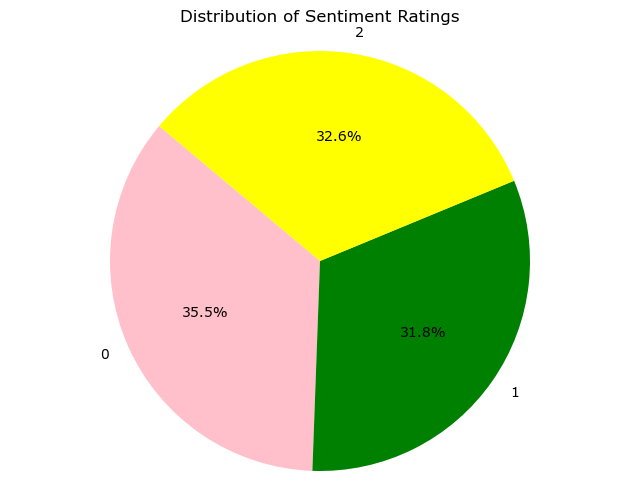

In [22]:
import matplotlib.pyplot as plt
sentiment_counts = combined_df['sentiment'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'green', 'yellow'])
plt.title('Distribution of Sentiment Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

(array([4.345e+03, 9.060e+02, 2.610e+02, 6.700e+01, 7.000e+00, 2.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  500. ,  1766.1,  3032.2,  4298.3,  5564.4,  6830.5,  8096.6,
         9362.7, 10628.8, 11894.9, 13161. ]),
 <BarContainer object of 10 artists>)

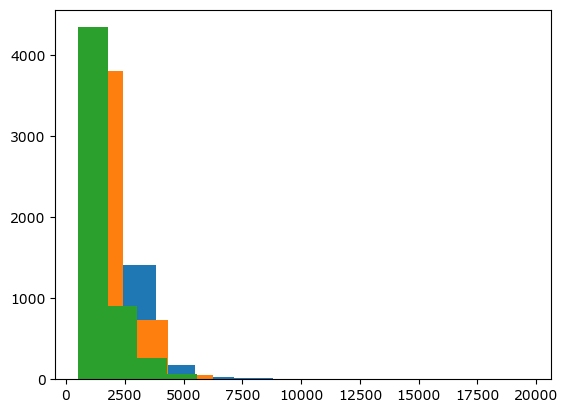

In [16]:
plt.hist(combined_df[combined_df['sentiment']==2]['review'].str.len())
# ax1.set_title( 'Positive Reviews')
plt.hist(combined_df[combined_df['sentiment']==1]['review'].str.len())
# ax2.set_title( 'Negative Reviews')
plt.hist(combined_df[combined_df['sentiment']==0]['review'].str.len())
# ax2.set_title( 'Negative Reviews')

In [21]:
combined_df.drop_duplicates(subset='review', inplace=True, keep='first')
combined_df

,review,sentiment
0,"Цей фільм вийшов прямо перед референдумом, яки...",0
1,Я не дивився повний фільм.Щойно переглянув усі...,0
2,"Цей дивовижний фільм навчає вас, як ідеально д...",0
3,"Cumali Ceber - один із найсміливіших фільмів, ...",0
4,"Ну, не багато чого сказати.Цей огляд базується...",0
...,...,...
15339,"Якщо ви подивитесь на цей фільм, і ви шануваль...",1
15340,"Людина, цей фільм був гіршим, ніж відгуки (і в...",0
15341,"Вау.Я не мав уявлення, що фільм може бути таки...",0
15342,Перший фільм був невтішним і посереднім фільмо...,0


In [20]:
combined_df.to_excel('combined_15000.xlsx')

In [8]:
dfc = pd.read_excel('combined_11000.xlsx')
dfn = pd.read_csv('imdb_reviews_ukrainian__negative_2_4.csv')
dfn['Stars'].replace('No rating', pd.NA, inplace=True)

# Drop rows where 'Rating' is NaN
dfn.dropna(subset=['Stars'], inplace=True)
dfn['Stars'] = dfn['Stars'].astype(int)
dfn['sentiment'] = dfn['Stars'].apply(
    lambda x: 0 if x <= 3 else (1 if x <= 7 else 2)
)


C:\Users\BOSS\AppData\Local\Temp\ipykernel_25540\3238468793.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfn['Stars'].replace('No rating', pd.NA, inplace=True)


In [9]:
dfn

,Title,Review,Stars,Review_Ukrainian,sentiment
0,Enes Batur: Hayal Mi Gerçek Mi? (2018),This movie is a tool to convert Youtube Fans i...,1,Цей фільм - це інструмент для перетворення шан...,0
1,Enes Batur: Hayal Mi Gerçek Mi? (2018),While reviewing this movie the first thing to ...,1,"Під час перегляду цього фільму перше, що слід ...",0
2,Enes Batur: Hayal Mi Gerçek Mi? (2018),Second-hand embarrassment at its finest. Even ...,1,Збентеження секонд-хенду в найкращій.Навіть лю...,0
3,Enes Batur: Hayal Mi Gerçek Mi? (2018),"To be honest, it doesn't deserve either 1 or 1...",1,"Якщо чесно, це не заслуговує ні 1, ні 10. Він ...",0
4,Enes Batur: Hayal Mi Gerçek Mi? (2018),-waste of time -loss of money\ndisgusting scri...,1,-вастям часу -Висота грошей\nогидний сценарій\...,0
...,...,...,...,...,...
8062,Death Race 2050 (Video 2017),It's a sequel/remake of Death Race 2000... and...,6,NaN,1
8063,Death Race 2050 (Video 2017),I know there is lots of great comments about t...,1,NaN,0
8064,Death Race 2050 (Video 2017),OK. So it is cheap. The effects are terrible. ...,8,NaN,2
8065,Death Race 2050 (Video 2017),"In true Deathrace style, Death Race 2050 is a ...",7,NaN,1


In [10]:
dfn = dfn.rename(columns={'Review_Ukrainian': 'review'})

dfn_selected = dfn[['review', 'sentiment']]

# Concatenate both DataFrames vertically to merge reviews into a single column
combined_df = pd.concat([dfc, dfn_selected], axis=0, ignore_index=True)


In [11]:

combined_df.dropna(subset='review', inplace=True)
combined_df

,Unnamed: 0,review,sentiment
0,0.0,"Цей фільм вийшов прямо перед референдумом, яки...",0
1,1.0,Я не дивився повний фільм.Щойно переглянув усі...,0
2,2.0,"Цей дивовижний фільм навчає вас, як ідеально д...",0
3,3.0,"Cumali Ceber - один із найсміливіших фільмів, ...",0
4,4.0,"Ну, не багато чого сказати.Цей огляд базується...",0
...,...,...,...
17095,NaN,"Людина, цей фільм був гіршим, ніж відгуки (і в...",0
17096,NaN,"Вау.Я не мав уявлення, що фільм може бути таки...",0
17099,NaN,Перший фільм був невтішним і посереднім фільмо...,0
17100,NaN,"Незважаючи на те, що IG2 трохи дурніше, ніж пе...",2
